<h1>Figure 1</h1>
<p>Data for this figure are can be found in the following files: </p>
<table>
    <tr>
        <th>Filename</th>
        <th>Content</th>
    </tr>
    <tr>
       <td><a href="RawData/120106_CFLucs_Blot1.jpg" target=_blank>120106 CFLucs Blot1.jpg</a>, <a href="RawData/120110_CFLucs_Blot2.jpg" target=_blank>120110 CFLucs Blot2.jpg</a> and <a href="RawData/120110_CFLucs_Blot3.jpg" target=_blank>120110 CFLucs Blot3.jpg</a></td>
        <td>Scanned Images of anti-firefly luciferase blots for quantification.</td>
    </tr>    
    <tr>
        <td><a href="RawData/1201_CFLuc_Blots.csv" target=_blank>1201 CFLuc Blots.csv</a></td>
        <td><a href="https://imagej.nih.gov/ij/index.html" target=_blank>ImageJ</a> quantifiaction data of blot images</td>
    </tr>
    <tr>
        <td><a href="RawData/110818_2u_CEN_CFlucs.csv" target=_blank>110818_2u_CEN_CFlucs.csv</a></td>
        <td>Dual luciferase assay data.</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the function for processing luciferase data by running script lucs.py
%cd Scripts
%run lucs.py
%cd ..

C:\Users\Tvon-\Dropbox\Python\18 Codon Selection\Scripts
C:\Users\Tvon-\Dropbox\Python\18 Codon Selection


In [2]:
#read in the blot data
blot_data = pd.read_csv('RawData/1201_CFLuc_Blots.csv', header=1)

#normalise all data to the CEN/sta mean
norm_Signal,signal_group = [],[]
#go through each blot
for blot in [1,2,3]:
    this_blot = blot_data.loc[blot_data['Blot_No'] == blot]
    this_blot = this_blot.loc[this_blot['Vector'] == '2u']
    norm_value = this_blot.loc[this_blot['Fluc'] == 'sta']['Signal']
    #go through each band
    for row in range(this_blot.shape[0]):
        norm_Signal.append(float(this_blot.iloc[row]['Signal'] / norm_value)) 
        signal_group.append(this_blot.iloc[row]['Fluc'])
        
blot_results = pd.DataFrame({'Factor':signal_group,'norm_Signal':norm_Signal})
blot_results['Experiment'] = ['2 micron Western Blot'] * blot_results.shape[0]

#read in the luciferase assay results using the read_luc function defined in lucs.py
luc_data = read_luc('RawData/110818_2u_CEN_CFlucs.csv')
#separate the F/R ratios for the 2u and the CEN constructs
twomicron_data = luc_data.loc[luc_data['Factor 1'] == '2u']
CEN_data = luc_data.loc[luc_data['Factor 1'] == 'CEN']
#for each type of construct, normalise values by the average of sta
twomicron_normalised, CEN_normalised, twomicron_factor, CEN_factor = [],[],[],[]
for row in range(twomicron_data.shape[0]):
    twomicron_norm_value = np.mean(twomicron_data.loc[twomicron_data['Factor 2'] == 'sta']['FR_ratio'])
    twomicron_normalised.append(twomicron_data.iloc[row]['FR_ratio'] / twomicron_norm_value)
    twomicron_factor.append(twomicron_data.iloc[row]['Factor 2'])
    
twomicron_normalised = pd.DataFrame({'Factor':twomicron_factor,'norm_Signal':twomicron_normalised})
twomicron_normalised['Experiment'] = ['2 micron luciferase'] * twomicron_normalised.shape[0]

for row in range(CEN_data.shape[0]):    
    CEN_norm_value = np.mean(CEN_data.loc[CEN_data['Factor 2'] == 'sta']['FR_ratio'])
    CEN_normalised.append(CEN_data.iloc[row]['FR_ratio'] / CEN_norm_value)
    CEN_factor.append(CEN_data.iloc[row]['Factor 2'])

CEN_normalised = pd.DataFrame({'Factor':CEN_factor,'norm_Signal':CEN_normalised})
CEN_normalised['Experiment'] = ['CEN luciferase'] * CEN_normalised.shape[0]

results = pd.concat([blot_results,twomicron_normalised,CEN_normalised])
results = results.reset_index(drop=True)

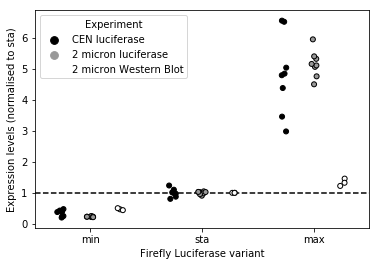

In [3]:
sns.set_palette(['#000000','#999999', '#ffffff'])
sns.stripplot(x = 'Factor', y = 'norm_Signal', hue='Experiment', data = results, dodge=True, 
            order=['min','sta','max'], 
            hue_order=['CEN luciferase','2 micron luciferase','2 micron Western Blot'],
            edgecolor = '#000000',linewidth=1,jitter=True)
plt.xlabel('Firefly Luciferase variant')
plt.ylabel('Expression levels (normalised to sta)')
plt.axhline(1, ls='dashed')
#plt.savefig('Figure 1.svg')
plt.show()